# Comparación con test

# Carga de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


import joblib
import os

from sklearn.decomposition import PCA


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


## Cargo datos train

In [4]:
df_train = pd.read_csv('./data/df_precios_ordenadores.csv', index_col=0)
df_train.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'Resolution', 'Pantalla', 'Brand', 'Family', 'Model',
       'Clock Speed (GHz)', 'Gpu Brand', 'Gpu Model', 'Gpu Type',
       'Storage Type'],
      dtype='object')

In [5]:
df_train.shape

(912, 17)

In [6]:
df_train.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type
id,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,1366x768,Full HD,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated,HDD
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,1366x768,Full HD,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown,HDD
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,1920x1080,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,SSD
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,3840x2160,4K Ultra HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated,SSD
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,1920x1080,Full HD,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown,SSD
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,1920x1080,Full HD,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated,SSD
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,SSD
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated,SSD


# Cargo datos test

In [7]:
df_test = pd.read_csv('./data/df_test_precios_ordenadores.csv',index_col=0)
df_test.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type'],
      dtype='object')

In [8]:
df_test.shape

(391, 16)

In [9]:
df_test.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type
id,,,,,,,,,,,,,,,,
181,HP,Ultrabook,13.3,16,Windows 10,1.30,3840x2160,4K Ultra HD,Intel,Core i7,7500U,2.7,Intel,HD Graphics 620,Unknown,SSD
708,Acer,Notebook,15.6,8,Windows 10,2.20,1366x768,Full HD,AMD,A12-Series,9720P,2.7,AMD,Radeon RX 540,Dedicated,SSD
862,Acer,Notebook,15.6,4,Linux,2.40,1366x768,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,HDD
1064,HP,Notebook,14.0,8,Windows 7,1.43,1920x1080,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,SSD
702,HP,Notebook,13.3,8,Windows 10,1.34,1920x1080,Full HD,Intel,Core i5,7200U,2.5,Intel,HD Graphics 620,Unknown,SSD
585,Dell,2 in 1 Convertible,15.6,16,Windows 10,2.00,1920x1080,Full HD,Intel,Core i7,8550U,1.8,Intel,UHD Graphics 620,Unknown,SSD
195,Razer,Gaming,14.0,16,Windows 10,1.95,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1060,Dedicated,SSD
463,Asus,Notebook,15.6,4,Linux,2.10,1920x1080,Full HD,Intel,Core i5,7200U,2.5,Nvidia,GeForce 920,Dedicated,HDD


Elimino la columna target Price_euros

In [10]:
X_train = df_train.drop(columns='Price_euros')
y_train = df_train['Price_euros']

In [12]:
features_list = X_train.columns.tolist()

df_test = df_test[features_list]

In [13]:
X_test = df_test

In [14]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
print("Las columnas son las mismas y están en el mismo orden:", son_iguales)


Las columnas son las mismas y están en el mismo orden: True


## Cargo el modelo entrenado

In [24]:
#model_path = os.path.join('models', 'grid_search.pkl')
#grid_search_cat_scaled = joblib.load(model_path)

## Comparo contra test

In [15]:
features_cat = X_train.select_dtypes(include='object').columns.tolist()

X_train = pd.get_dummies(X_train, features_cat, dtype=int)
X_test = pd.get_dummies(X_test,features_cat,dtype=int)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Columns: 250 entries, Inches to Storage Type_SSD
dtypes: float64(3), int32(246), int64(1)
memory usage: 912.0 KB


In [17]:
X_train.shape

(912, 250)

In [18]:
X_test.shape

(391, 207)

In [19]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
if son_iguales == True:
    print("Las columnas son las mismas y están en el mismo orden:", son_iguales)
else:
    col_diferentes = set(X_train)-set(X_test)
    print(col_diferentes)


{'Model_6560U', 'Gpu Model_GeForce GTX1050 Ti', 'Model_6920HQ', 'Gpu Model_GeForce 960M', 'Model_x5-Z8350', 'Gpu Model_GeForce GTX 1050Ti', 'Gpu Model_Iris Pro Graphics', 'Gpu Model_Radeon R7 Graphics', 'Resolution_1920x1200', 'Gpu Model_GeForce GTX 940M', 'Gpu Model_Radeon RX 550', 'Gpu Model_Radeon R7', 'Model_E2-9000', 'Gpu Model_Radeon Pro 555', 'Gpu Model_GTX 980 SLI', 'Resolution_2304x1440', 'Model_E3-1505M', 'Model_1.1GHz', 'Model_1600', 'Gpu Model_Quadro M2000M', 'Gpu Model_R4 Graphics', 'Model_8800P', 'Model_x5-Z8300', 'Gpu Model_HD Graphics 5300', 'Model_2.3GHz', 'Model_9000', 'Gpu Model_Radeon R5 520', 'Gpu Model_Graphics 620', 'Gpu Model_FirePro W6150M', 'Gpu Model_Radeon R7 M365X', 'Model_9000e', 'Gpu Model_Radeon R7 M460', 'Model_E3-1535M', 'Model_9700P', 'Model_m3', 'Model_2.2GHz', 'Family_FX', 'Gpu Model_Radeon R5 M315', 'Model_M3-6Y30', 'Gpu Model_Radeon R2 Graphics', 'Model_3.1GHz', 'Model_Z8350', 'Model_1.3GHz', 'Model_6110', 'Gpu Model_Iris Plus Graphics 650', 'OpSy

In [20]:
# Alineo las columnas añadiendo las faltantes con valor cero.
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [21]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
if son_iguales == True:
    print("Las columnas son las mismas y están en el mismo orden:", son_iguales)
else:
    col_diferentes = set(X_train)-set(X_test)
    print(col_diferentes)


Las columnas son las mismas y están en el mismo orden: True


In [22]:
X_train.shape

(912, 283)

In [23]:
X_test.shape

(391, 283)

_____

He conseguido sacar la optimización del gbr_4

In [21]:
# Cargo el modelo entrenado
model_path = os.path.join('models', 'gbr_grid_4.pkl')
gbr_grid_4 = joblib.load(model_path)

In [22]:

features_selector = ['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_LG',
       'Company_Lenovo', 'Company_Razer', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Windows 10', 'OpSys_Windows 7']

In [23]:
X_train.shape

(912, 47)

In [24]:
X_test.shape

(391, 47)

Tengo que escalar las variables

In [25]:
features_scaled = X_train.select_dtypes(include=(['int','float'])).columns.tolist()

print(features_scaled)
scaler = StandardScaler()

temp_x_train = scaler.fit_transform(X_train[features_scaled])
X_train_scaled = X_train.copy()
X_train_scaled[features_scaled] = temp_x_train


temp_x_test = scaler.transform(X_test[features_scaled])
X_test_scaled = X_test.copy()
X_test_scaled[features_scaled] = temp_x_test



['Clock_speed_disc', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Family_disc', 'GPU_model_disc', 'Gpu Type_Dedicated', 'Gpu Type_Unknown', 'Gpu_Brand_disc', 'Inches', 'Modelo_procesador_disc', 'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Pantalla_disc', 'Ram', 'Resolution_disc', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Weight', 'storage_type_disc']


In [30]:
X_test_model_cat = X_test_scaled[features_selector]
y_predict_gbr_4 = gbr_grid_4.predict(X_test_model_cat)
y_predict_gbr_4

array([2181.24938015,  614.55984353,  366.68121221, 1456.92110932,
       1091.488114  , 1397.09928079, 2948.1788443 ,  544.34991962,
       1806.38035691, 1903.66753373, 1361.30802624,  528.78402288,
        251.36585958,  644.68140578,  386.50982427, 1494.64688908,
        381.55021999, 2134.34042511, 1662.96342311, 1543.59290887,
       1326.21517609, 1372.55263567, 1849.13410473, 1377.226407  ,
       1789.85543661,  386.81729298,  949.65896049,  315.46827836,
       1068.58672599,  519.68966336,  982.74445763, 1193.45757691,
       2001.88883118,  330.82216334,  650.9389389 , 1564.26657136,
        821.49501938,  682.18749223, 3056.93662758,  620.4413043 ,
        595.07883929,  990.73764162,  804.84081252, 1984.49188436,
        892.05816533, 1682.92016967,  474.40201523, 3294.77160032,
        286.90261984, 1263.24286345, 1109.24695943,  978.59179641,
        916.27555565,  357.88873624, 1107.49077966,  780.25097311,
        901.18839567,  254.07896334, 1616.89595179, 1057.09594

## Cargo sample_submission

In [31]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [32]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr_4.round(2)

In [33]:
sample

,id,Price_euros
0,181,2181.25
1,708,614.56
2,862,366.68
3,1064,1456.92
4,702,1091.49
...,...,...
386,1281,973.67
387,524,1253.65
388,1015,541.85
389,1236,699.98


In [34]:
sample.to_csv('./data/submission_gbr_4.csv',index=False)

In [35]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [36]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

In [86]:
X_train_model = X_train_scaled[features_selector]

gb= GradientBoostingRegressor(max_depth=5, random_state=42)

param_grid_gb_reg = {
    'n_estimators': [100, 200,300],
    'max_depth': [5,6,7],
    'learning_rate': [0.08, 0.1,0.2],
    'subsample': [0.2, 0.5, 1.0]
    
}

gbr_grid = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid.fit(X_train_model, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1, 0.2],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.5, 1.0]},
             scoring='neg_mean_absolute_error')

In [87]:
best_model_gb_reg = gbr_grid.best_estimator_
best_params_gb_reg = gbr_grid.best_params_
best_score_gb_reg = gbr_grid.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')

Best Parameters for Regression: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.5}
Best Score for Regression: -163.4830373325415


In [80]:
X_test_model_cat = X_test_scaled[features_selector]
y_predict_gbr = gbr_grid.predict(X_test_model_cat)
y_predict_gbr

array([1953.96155957,  680.40443031,  330.87811478, 1461.21441152,
       1224.29997146, 1382.58331509, 3084.37137331,  609.59335424,
       2125.86873998, 2055.64839155, 1443.12419777,  539.52699939,
        262.56292379,  706.8089067 ,  372.3468642 , 1492.02945039,
        376.72190271, 2050.12903531, 1635.48839843, 1583.34119704,
       1555.71350559, 1444.26477484, 1754.46155536, 1474.97068251,
       1807.48169323,  392.60862927,  952.89596923,  308.5227573 ,
       1087.32622896,  514.91912539,  975.48975527, 1176.12224581,
       2017.40280012,  307.65620598,  657.03746402, 1531.63214134,
        817.146441  ,  626.36104517, 3121.45287572,  625.6517889 ,
        598.03836972,  933.48336684,  841.63615082, 1938.22531734,
        937.69219971, 1682.86901336,  454.21292599, 3189.38156395,
        308.8425973 , 1336.222141  , 1135.16672874,  949.05656358,
        938.58442419,  345.43788186, 1085.66853691,  774.32990871,
        866.87537493,  259.16956199, 1653.86872122, 1103.50270

## Cargo sample_submission

In [81]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [82]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr.round(2)

In [83]:
sample

,id,Price_euros
0,181,1953.96
1,708,680.40
2,862,330.88
3,1064,1461.21
4,702,1224.30
...,...,...
386,1281,878.09
387,524,1412.56
388,1015,511.94
389,1236,572.03


In [84]:
sample.to_csv('./data/submission_gbr.csv',index=False)

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [85]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

Pruebo con PCA (Análisis de Componenetes Principales)

In [47]:
pca_cl = PCA()

pca_cl.fit(X_train)

X_train_pca = pca_cl.transform(X_train)

In [48]:
X_train_pca.shape

(912, 283)

In [49]:
df_pca = pd.DataFrame(
    data = pca_cl.components_,
    columns=X_train.columns,
    index=[f'PC{n}' for n in range(1,X_train.shape[1]+1)]
)

df_pca.head(8)

,Brand_AMD,Brand_Intel,Brand_Samsung,Clock Speed (GHz),Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Storage Type_HDD,Storage Type_Hybrid,Storage Type_SSD,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Weight
PC1,-0.004055,0.004055,1.110223e-16,0.040775,-0.007434,0.000548,0.002552,-0.000375,0.008239,-0.000213,...,-0.027877,-0.000014,0.037321,-0.000121,0.037922,-0.002748,-0.041197,0.004304,0.001839,0.058518
PC2,-0.024451,0.024451,3.885781e-16,-0.074947,-0.013136,0.017854,-0.020827,-0.000502,-0.013763,-0.000532,...,-0.101675,-0.003025,0.060566,0.068838,-0.072023,0.017390,-0.115196,0.109283,-0.008292,-0.312881
PC3,-0.026940,0.026940,-3.885781e-16,-0.195977,0.022375,0.000688,-0.016871,0.001254,0.009699,0.005558,...,0.247473,-0.006332,-0.251789,-0.025614,-0.124290,-0.006618,0.257192,-0.078932,-0.021738,0.061408
PC4,0.036397,-0.036397,3.053113e-16,-0.263498,0.054429,0.023744,0.051966,0.000276,0.040013,-0.004810,...,0.136004,0.002759,-0.263980,0.004858,0.057665,0.034616,-0.079661,-0.024868,0.007390,0.040624
PC5,0.081270,-0.081270,3.330669e-16,-0.083814,0.000655,0.021353,-0.077200,-0.002716,0.214180,0.001260,...,0.125802,0.004022,-0.135631,-0.047792,-0.127352,0.001108,0.233391,-0.044496,-0.014860,-0.076187
PC6,0.091761,-0.091761,-2.775558e-17,0.525916,-0.049183,-0.010240,-0.089959,-0.005663,0.046473,-0.000042,...,0.325260,0.009059,-0.244759,-0.030561,-0.118905,-0.014413,0.085132,0.067945,0.010802,-0.128907
PC7,0.072963,-0.072963,-4.440892e-16,-0.228927,-0.041527,-0.008498,-0.093646,0.003293,0.068622,-0.006644,...,-0.123877,0.008613,0.168986,-0.022928,-0.277404,-0.029594,0.276436,0.061158,-0.007669,-0.194124
PC8,0.017573,-0.017573,-1.873501e-16,0.217030,-0.015893,0.034912,-0.161870,-0.005560,-0.039012,0.003606,...,-0.174044,0.003014,0.233761,-0.008846,0.004738,-0.015774,-0.003147,0.017017,0.006011,0.063677


In [50]:
pca_cl.explained_variance_ratio_

array([7.40636318e-01, 7.77688467e-02, 2.11150285e-02, 1.61562338e-02,
       1.10645948e-02, 9.46847612e-03, 8.50787820e-03, 7.64802942e-03,
       7.29055006e-03, 6.65829551e-03, 6.29272966e-03, 5.47363874e-03,
       5.01882351e-03, 4.80225332e-03, 4.29629501e-03, 4.11953727e-03,
       3.13628213e-03, 2.89841396e-03, 2.87927408e-03, 2.61237032e-03,
       2.45123192e-03, 2.38626760e-03, 2.07015027e-03, 1.93580588e-03,
       1.77484306e-03, 1.60777232e-03, 1.59469395e-03, 1.50657675e-03,
       1.45917898e-03, 1.41226995e-03, 1.29898094e-03, 1.28533288e-03,
       1.17675757e-03, 1.06365637e-03, 1.04630977e-03, 9.62254609e-04,
       9.27205389e-04, 8.82096686e-04, 8.64905126e-04, 8.16472620e-04,
       7.89675061e-04, 7.74522623e-04, 7.50845580e-04, 7.08122935e-04,
       6.78894330e-04, 6.45980537e-04, 6.14258397e-04, 5.90538329e-04,
       5.64428680e-04, 5.39346632e-04, 5.29043339e-04, 4.93301125e-04,
       4.78620355e-04, 4.53652117e-04, 4.30496958e-04, 4.13300992e-04,
      

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.74063632 0.81840516 0.83952019 0.85567643 0.86674102 0.8762095
 0.88471738 0.89236541 0.89965596 0.90631425 0.91260698 0.91808062
 0.92309944 0.9279017  0.93219799 0.93631753 0.93945381 0.94235222
 0.9452315  0.94784387 0.9502951  0.95268137 0.95475152 0.95668732
 0.95846217 0.96006994 0.96166463 0.96317121 0.96463039 0.96604266
 0.96734164 0.96862697 0.96980373 0.97086739 0.9719137  0.97287595
 0.97380316 0.97468525 0.97555016 0.97636663 0.97715631 0.97793083
 0.97868167 0.9793898  0.98006869 0.98071467 0.98132893 0.98191947
 0.9824839  0.98302324 0.98355229 0.98404559 0.98452421 0.98497786
 0.98540836 0.98582166 0.98622222 0.98661832 0.98700309 0.98737682
 0.98772782 0.98807363 0.98840653 0.98873161 0.98903874 0.98934218
 0.98964147 0.98991539 0.99018812 0.99044442 0.99068641 0.99092402
 0.9911608  0.99138509 0.99160558 0.99182443 0.99203923 0.99224519
 

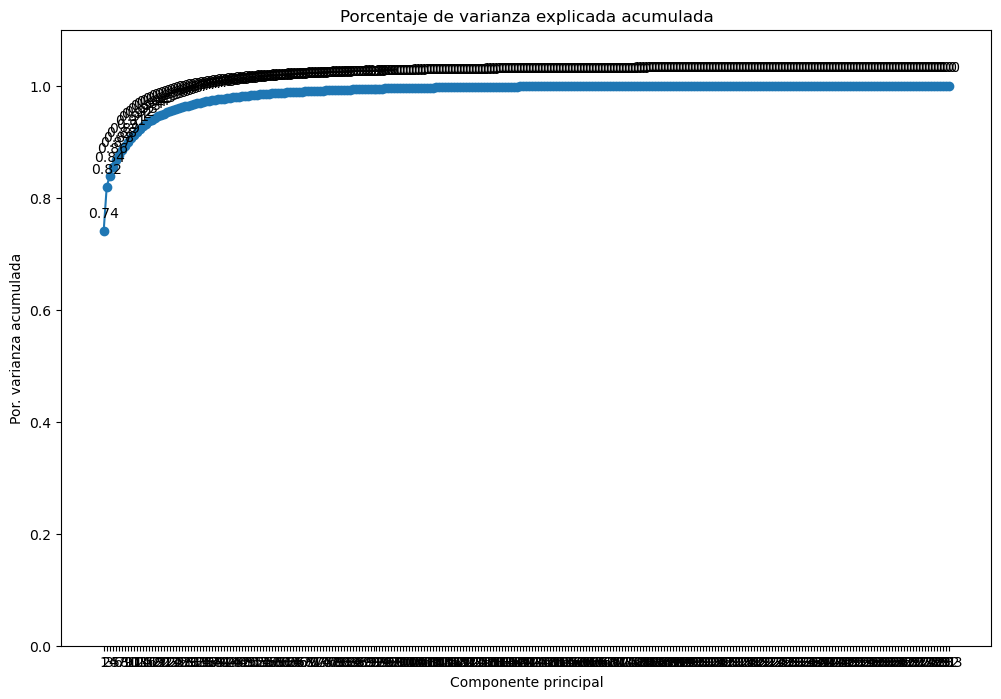

In [51]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_cl.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(
    np.arange(len(X_train.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_cl.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [35]:
rf_pca = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42,verbose=0)
scores_pca = []
for num_PCs in range(5,10):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]# Array de numpy. Al estar ordenadas me quedo con las que quiero.
    score_pca = np.mean(cross_val_score(rf_pca, X_train_pca_reduced, y_train, cv = 5, scoring = "neg_mean_absolute_error"))
    print(score_pca)
    scores_pca.append(score_pca)

Probando con 5 componentes:
-251.27650821109427
Probando con 6 componentes:
-246.58088993058044
Probando con 7 componentes:
-249.2962260335221
Probando con 8 componentes:
-241.00375602037246
Probando con 9 componentes:
-235.8975683130494


In [43]:
rf_pca =CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42,verbose=0)
scores_pca = []
dicc_pca = {}
for num_PCs in range(1,X_train_pca.shape[1]):
    # print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]# Array de numpy. Al estar ordenadas me quedo con las que quiero.
    score_pca = np.mean(cross_val_score(rf_pca, X_train_pca_reduced, y_train, cv = 5, scoring = "neg_mean_absolute_error"))
   
    scores_pca.append(score_pca)
    if score_pca > -156:
        dicc_pca[num_PCs]= score_pca
dicc_pca
        

{1: -323.0846700841122,
 2: -268.82739765843655,
 3: -270.38388404339787,
 4: -260.93101538262727,
 5: -251.27650821109427,
 6: -246.58088993058044,
 7: -249.2962260335221,
 8: -241.00375602037246,
 9: -235.8975683130494,
 10: -237.8192285755719,
 11: -236.46803538931675,
 12: -235.4168268994387,
 13: -227.28950171830715,
 14: -228.34238016506583,
 15: -224.53745775305327,
 16: -228.66079895718153,
 17: -225.87312672130656,
 18: -226.36815133201108,
 19: -225.24147136655915,
 20: -225.47271111031895,
 21: -226.36507618703507,
 22: -224.31164504332642,
 23: -221.10783661361765,
 24: -226.37328708616474,
 25: -225.40028072327567,
 26: -223.14404481843948,
 27: -225.81714696917783,
 28: -220.16307676904762,
 29: -219.86456316226304,
 30: -218.81115195609874,
 31: -219.14671117818452,
 32: -218.6280654141799,
 33: -221.2423891477155,
 34: -222.82988428059767,
 35: -216.12020568792695,
 36: -217.78541064086502,
 37: -214.51394255738305,
 38: -216.66484879868267,
 39: -213.47641664442645,
 4

Pues aparentemente no mejoro los otros modelos

___

In [93]:
X_train_model = X_train_scaled

gb= GradientBoostingRegressor(max_depth=5, random_state=42)

param_grid_gb_reg = {
    'n_estimators': [100, 200,300],
    'max_depth': [6,7,8],
    'learning_rate': [0.07,0.08, 0.09],
    'subsample': [0.2, 0.5, 1.0]
    
}

gbr_grid_all = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid_all.fit(X_train_model, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.08, 0.09],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.5, 1.0]},
             scoring='neg_mean_absolute_error')

In [94]:
best_model_gb_reg = gbr_grid_all.best_estimator_
best_params_gb_reg = gbr_grid_all.best_params_
best_score_gb_reg = gbr_grid_all.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')

Best Parameters for Regression: {'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Best Score for Regression: -158.06755669177548


Overfitting: luego a la hora de picarlo en Kaggle se va a 174€ el error

In [96]:
y_predict_gbr_all = gbr_grid_all.predict(X_test_scaled)
y_predict_gbr_all

array([2015.40141864,  589.54316697,  370.8093447 , 1425.91268129,
       1058.82922029, 1297.55001043, 3088.64231585,  628.53796948,
       2051.05462029, 2158.07221924, 1445.47075529,  557.20417132,
        271.75434007,  716.17874077,  396.88770411, 1495.59586989,
        299.38838211, 2045.77482369, 1687.1244533 , 1582.80317655,
       1518.35436799, 1406.26537821, 1744.09141338, 1474.02577092,
       1764.15991319,  373.2508458 ,  998.63722918,  310.97837104,
       1143.67769515,  516.12942277,  964.59758402, 1335.56679557,
       2002.1627439 ,  304.11595401,  665.74226015, 1557.05658192,
        823.43284286,  620.42646791, 3134.43292   ,  629.98358721,
        705.04070702,  965.09283348,  949.52918572, 1915.54332151,
        896.03681442, 1704.44442429,  471.48906144, 3033.48897477,
        301.2962905 , 1349.023554  , 1163.21881342,  930.8330754 ,
        941.94826327,  315.91068587, 1210.63484312,  746.06689757,
        918.86434731,  231.82274434, 1538.97620926, 1080.28832

## Cargo sample_submission

In [95]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [97]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr_all.round(2)

In [98]:
sample

,id,Price_euros
0,181,2015.40
1,708,589.54
2,862,370.81
3,1064,1425.91
4,702,1058.83
...,...,...
386,1281,960.29
387,524,1330.80
388,1015,467.75
389,1236,608.55


In [99]:
sample.to_csv('./data/submission_gbr_all.csv',index=False)

In [100]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [101]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

Voy a probar el CatBoost con más variables que de primeras ha dado buen resultado en el cross_val_score

In [110]:
selector_model_plus =['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7']

In [112]:
cat = CatBoostRegressor(depth=6, random_state=42,verbose=0)

X_train_model = X_train[selector_model_plus]

param_grid = {
    'depth': [6, 7,8],
    'learning_rate': [0.03,0.05,0.06],
    'iterations': [1300,1400,1500]
}

# Instanciamos GridSearchCV
cat_grid = GridSearchCV(estimator=cat,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=0)

# Ejecutamos el ajuste de hiperparámetros
cat_grid.fit(X_train_model, y_train)

# Imprimimos los mejores parámetros encontrados
print(f'Mejores hiperparámetros: {cat_grid.best_params_}')
print(f'Mejor MAE: {cat_grid.best_score_}')

Mejores hiperparámetros: {'depth': 7, 'iterations': 1300, 'learning_rate': 0.05}
Mejor MAE: -156.98858352221058


In [113]:
import joblib
import os

model_path = os.path.join('models', 'cat_grid.pkl')
joblib.dump(cat_grid, model_path)

['models\\cat_grid.pkl']

In [116]:
y_predict_cat_plus = cat_grid.predict(X_test)
y_predict_cat_plus

array([2133.40272484,  810.67894457,  344.83589186, 1464.69409544,
       1158.64419268, 1366.15080473, 3049.58240801,  566.84440122,
       1781.93811542, 2244.65850382, 1424.50770821,  518.74958805,
        259.61036321,  684.53642152,  427.28756378, 1443.56049461,
        319.75145672, 2061.51239328, 1644.35178473, 1488.036824  ,
       1515.40646127, 1311.56656004, 1761.66972553, 1414.83978608,
       1781.25412147,  594.00628234,  917.3442165 ,  327.05845144,
       1134.2283925 ,  530.18828858,  965.84167292, 1199.63796475,
       2017.82709381,  327.96053142,  645.85355442, 1511.59063482,
        795.98573861,  619.3848214 , 3162.53589822,  730.35060895,
        596.95245545,  912.24901359,  982.07604616, 1946.62682977,
        904.08871028, 1756.65619822,  517.75360852, 2901.58592447,
        319.54765808, 1338.18814905, 1119.68908584,  927.82491685,
        947.59245344,  326.81562344, 1050.02847779,  699.56919486,
        742.2691088 ,  245.04882237, 1578.57832352, 1102.13128

## Cargo sample_submission

In [117]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [118]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_cat_plus.round(2)

In [119]:
sample

,id,Price_euros
0,181,2133.40
1,708,810.68
2,862,344.84
3,1064,1464.69
4,702,1158.64
...,...,...
386,1281,917.22
387,524,1385.46
388,1015,485.24
389,1236,539.23


In [120]:
sample.to_csv('./data/submission_cat_2.csv',index=False)

In [121]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined